[출처](https://www.datamanim.com/dataset/ADPpb/00/17.html)  

# 머신러닝
## 1번

- 데이터 설명 : 집과 관련된 여러 수치들과 집의 가격, log1p 정규화된 price 컬럼 예측 하기
- 데이터 출처 : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv 일부 전처리
- data Url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p3/problem1.csv

### 1.1 데이터 EDA 수행 후, 분석가 입장에서 의미있는 탐색
- 시각화 및 통계량 제시

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/17/problem1.csv')
df.head()

,Id,LotArea,LotFrontage,YearBuilt,1stFlrSF,2ndFlrSF,YearRemodAdd,TotRmsAbvGrd,KitchenAbvGr,BedroomAbvGr,GarageCars,GarageArea,price
0,1,8450,65.0,2003,856,854,2003,8,1,3,2,548,12.247699
1,2,9600,80.0,1976,1262,0,1976,6,1,3,2,460,12.109016
2,3,11250,68.0,2001,920,866,2002,6,1,3,2,608,12.317171
3,4,9550,60.0,1915,961,756,1970,7,1,3,3,642,11.849405
4,5,14260,84.0,2000,1145,1053,2000,9,1,4,3,836,12.429220


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   LotArea       1460 non-null   int64  
 2   LotFrontage   1201 non-null   float64
 3   YearBuilt     1460 non-null   int64  
 4   1stFlrSF      1460 non-null   int64  
 5   2ndFlrSF      1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   TotRmsAbvGrd  1460 non-null   int64  
 8   KitchenAbvGr  1460 non-null   int64  
 9   BedroomAbvGr  1460 non-null   int64  
 10  GarageCars    1460 non-null   int64  
 11  GarageArea    1460 non-null   int64  
 12  price         1460 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 148.4 KB


In [3]:
df.isna().sum()

Id                0
LotArea           0
LotFrontage     259
YearBuilt         0
1stFlrSF          0
2ndFlrSF          0
YearRemodAdd      0
TotRmsAbvGrd      0
KitchenAbvGr      0
BedroomAbvGr      0
GarageCars        0
GarageArea        0
price             0
dtype: int64

In [4]:
df.drop('Id', axis=1).describe()

,LotArea,LotFrontage,YearBuilt,1stFlrSF,2ndFlrSF,YearRemodAdd,TotRmsAbvGrd,KitchenAbvGr,BedroomAbvGr,GarageCars,GarageArea,price
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,70.049958,1971.267808,1162.626712,346.992466,1984.865753,6.517808,1.046575,2.866438,1.767123,472.980137,12.024057
std,9981.264932,24.284752,30.202904,386.587738,436.528436,20.645407,1.625393,0.220338,0.815778,0.747315,213.804841,0.399449
min,1300.000000,21.000000,1872.000000,334.000000,0.000000,1950.000000,2.000000,0.000000,0.000000,0.000000,0.000000,10.460271
25%,7553.500000,59.000000,1954.000000,882.000000,0.000000,1967.000000,5.000000,1.000000,2.000000,1.000000,334.500000,11.775105
50%,9478.500000,69.000000,1973.000000,1087.000000,0.000000,1994.000000,6.000000,1.000000,3.000000,2.000000,480.000000,12.001512
75%,11601.500000,80.000000,2000.000000,1391.250000,728.000000,2004.000000,7.000000,1.000000,3.000000,2.000000,576.000000,12.273736
max,215245.000000,313.000000,2010.000000,4692.000000,2065.000000,2010.000000,14.000000,3.000000,8.000000,4.000000,1418.000000,13.534474


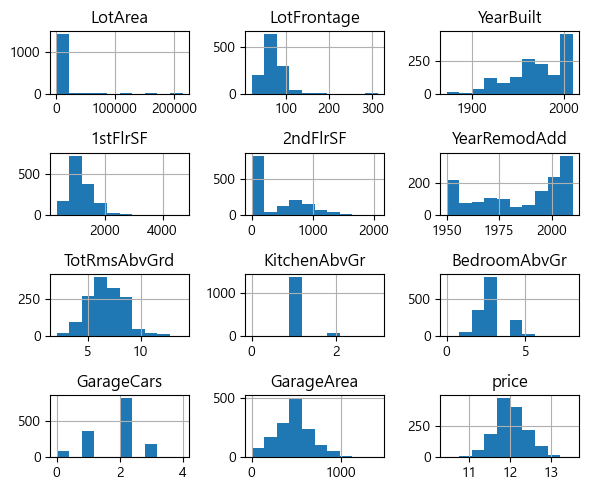

In [5]:
df.drop('Id', axis=1).hist(figsize=(6,5))
plt.tight_layout();

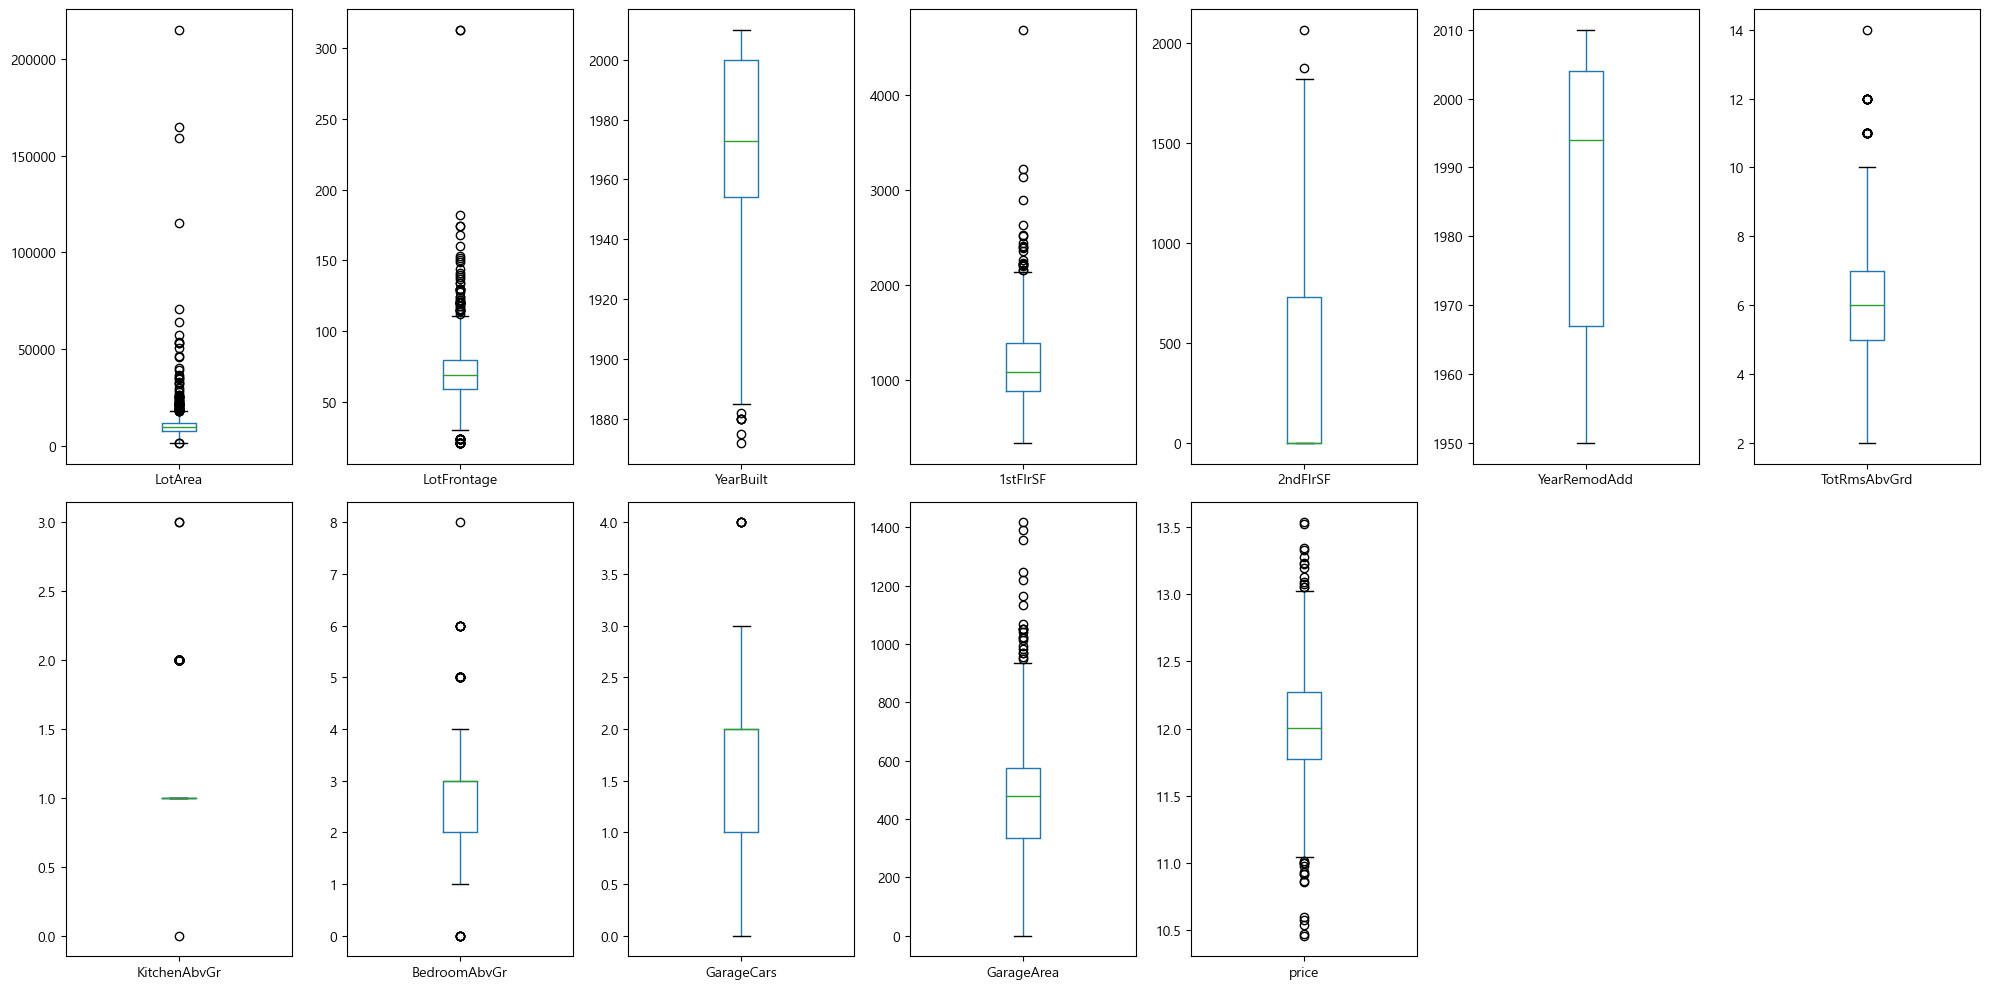

In [6]:
df.drop('Id', axis=1).plot(kind='box',subplots=True,layout=(2,len(df.columns)//2+1),figsize=(20,10))
plt.tight_layout()
plt.show()

In [7]:
import scipy.stats as stats
print(stats.shapiro(df.price))

ShapiroResult(statistic=0.9912054538726807, pvalue=1.1467612637261482e-07)


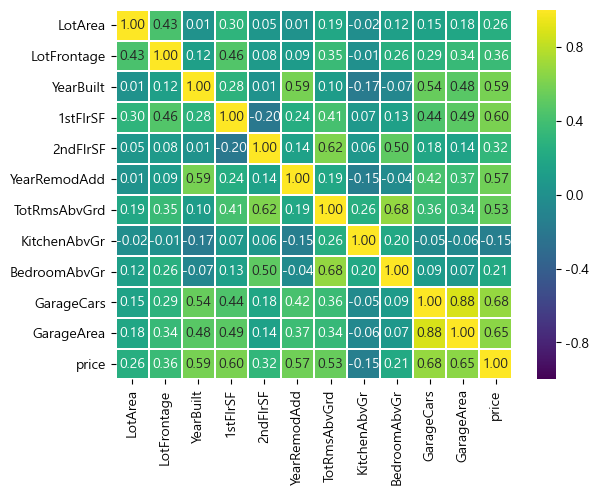

In [8]:
df_corr = df.drop('Id', axis=1).corr()
sns.heatmap(df_corr, cmap='viridis', vmin=-1, vmax=1, annot=True, fmt='.2f', linewidth=.3);

In [9]:
df.loc[df['LotFrontage'].isna(), 'LotFrontage'] = np.mean(df['LotFrontage'])
df.isna().sum()

Id              0
LotArea         0
LotFrontage     0
YearBuilt       0
1stFlrSF        0
2ndFlrSF        0
YearRemodAdd    0
TotRmsAbvGrd    0
KitchenAbvGr    0
BedroomAbvGr    0
GarageCars      0
GarageArea      0
price           0
dtype: int64

[해석]
1. 결측치 존재 여부
    - LotFrontage 259개가 존재하며 해당 변수는 float형태로 중앙값, 평균 또는 KNN 알고리즘을 이용해서 결측치를 다른 값으로 대체할 수 있다. 본 분석에서는 평균값으로 대체하였다.
1. 데이터 타입
    - 종속변수는 float형태이고, 독립변수들은 int, float형태로 구성되엉 있다.
1. 종속변수와 독립변수의 상관관계
    - 종속변수 price의 상관관계를 확인해 보았을 때, 수치형 변수에서는 큰 상관성이 없었다.
1. 독립변수 상관관계
    - 독립변수 간 상관관계를 파악한 결과, GarageCars와 GargeArea 간에 강한 양의 상관관계(약 0.88)를 파악하였다.
    - 따라서 두 변수에 대해 다중공선성을 의심할 수 있을 것이다.
1. 종속변수의 정규성 검정
    - 귀무가설: 정규성을 만족한다.
    - 대립가설: 정규성을 만족하지 않는다.

### 1.2 Train,Valid,Test set으로 분할 및 시각화 제시

<train data set>
X train data: (934, 11) / y train shape: (934,)

<valid data set>
X valid data: (234, 11) / y valid shape: (234,)

<test data set>
X test data: (292, 11) / y test shape: (292,)

<스케일링 전 시각화>


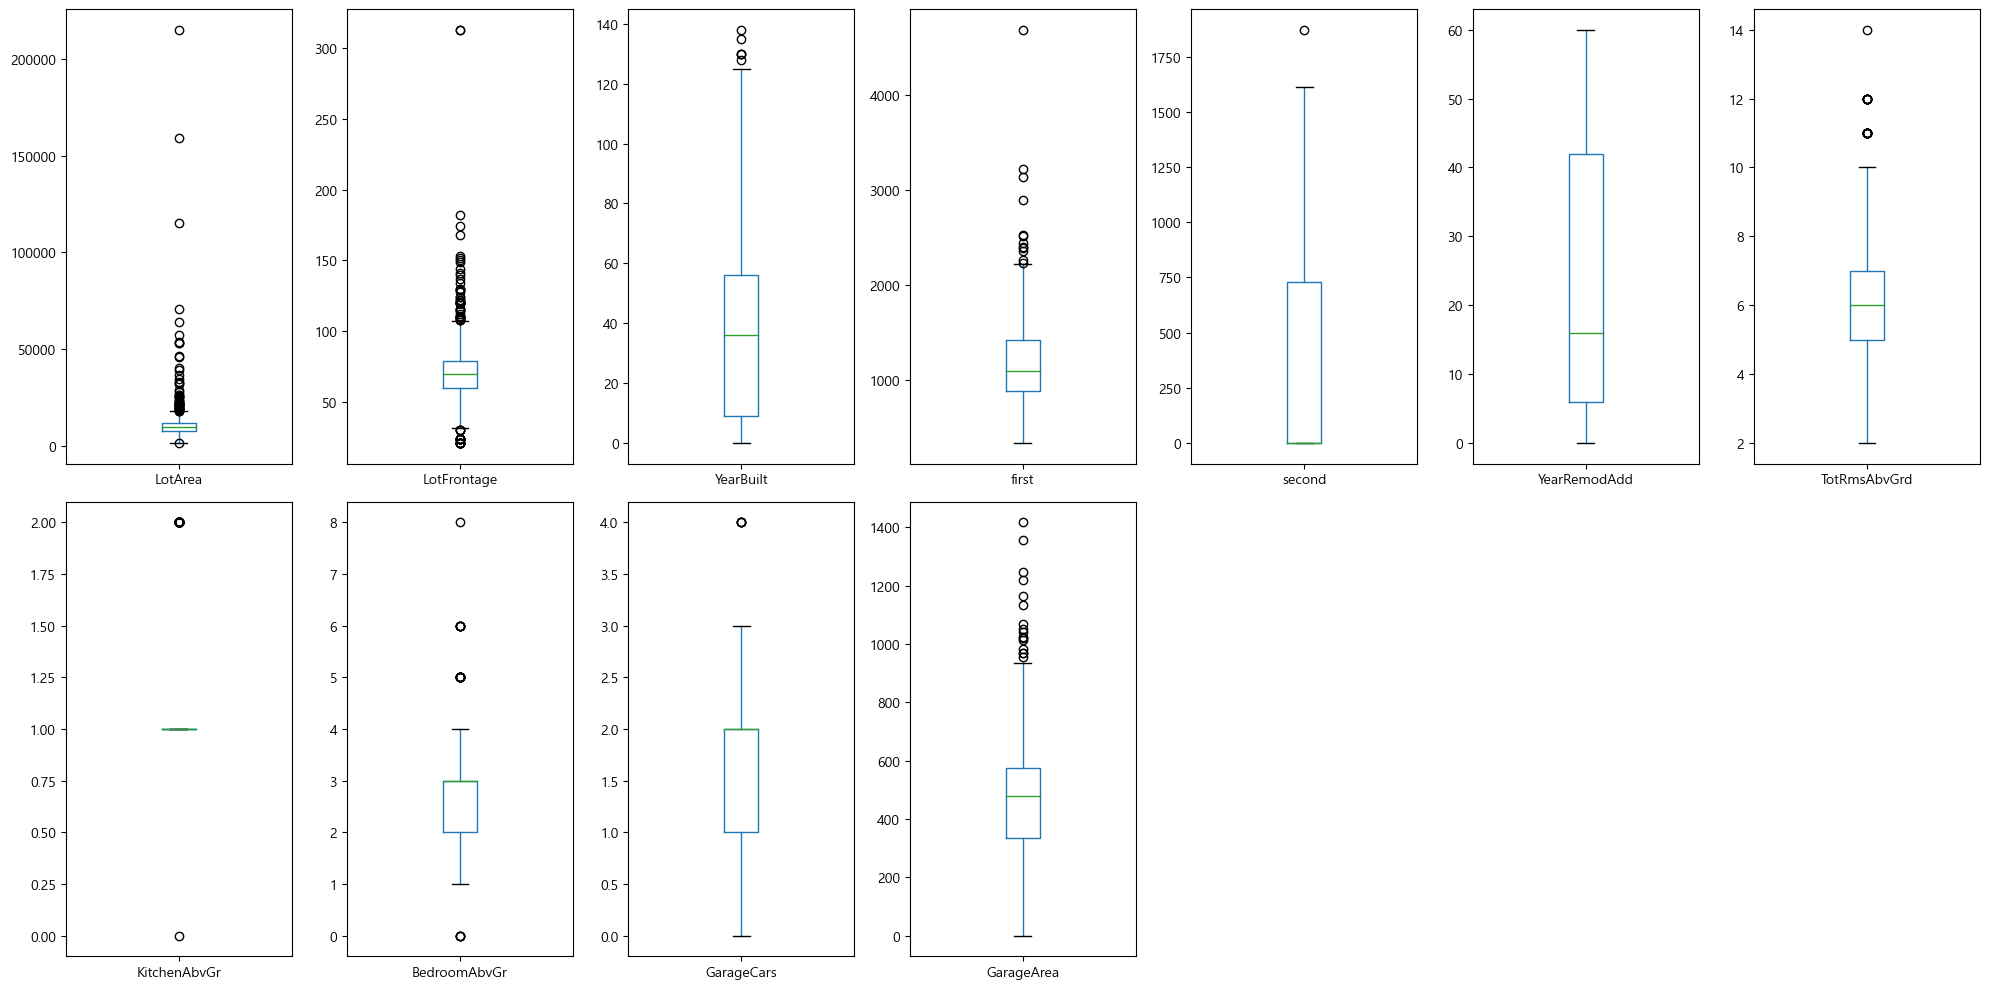

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df2 = df.copy()

# 컬럼에 숫자가 들어가면 statsmodels ols 동작시 에러발생
df2 = df2.rename(columns={'1stFlrSF':'first','2ndFlrSF':'second'})

# 년도 데이터의 경우 최대년도 기준 몇년전인지 값으로 대체
df2['YearBuilt']  = abs(df2['YearBuilt'] - df2['YearBuilt'].max())
df2['YearRemodAdd']  = abs(df2['YearRemodAdd'] - df2['YearRemodAdd'].max())

X = df2.drop(['Id', 'price'], axis=1)
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

print('<train data set>')
print('X train data: {0} / y train shape: {1}'.format(X_tr.shape, y_tr.shape))
print('\n<valid data set>')
print('X valid data: {0} / y valid shape: {1}'.format(X_val.shape, y_val.shape))
print('\n<test data set>')
print('X test data: {0} / y test shape: {1}'.format(X_test.shape, y_test.shape))

# 스케일링
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

print('\n<스케일링 전 시각화>')
X_train.plot(kind='box',subplots=True,layout=(2,len(df.columns)//2+1),figsize=(20,10))
plt.tight_layout()

스케일링 후 시각화


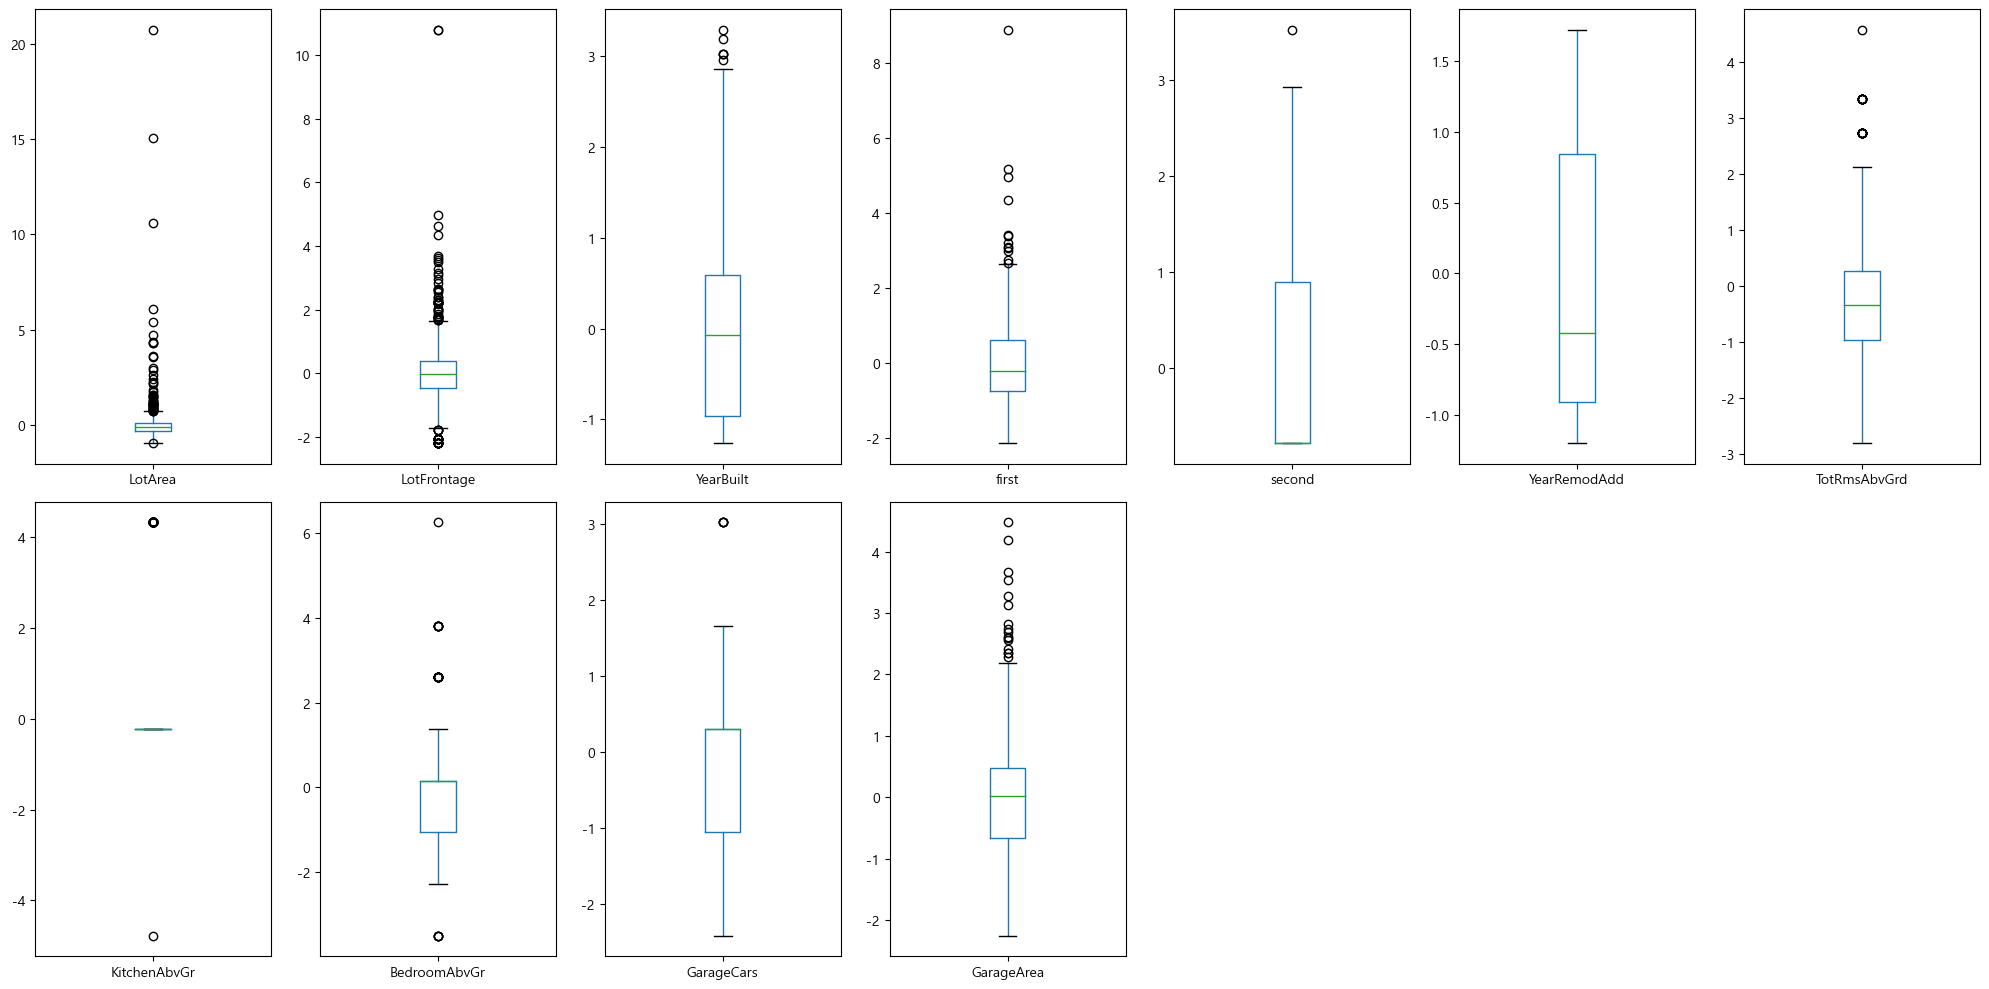

In [11]:
print('스케일링 후 시각화')
pd.DataFrame(X_train_sc,columns=X_train.columns).plot(kind='box',subplots=True,layout=(2,len(df.columns)//2+1),figsize=(20,10))
plt.tight_layout();

### 1.3 2차 교호작용항 까지 고려한 회귀분석 수행 및 변수 선택 과정 제시

In [12]:
from itertools import permutations 
comb = list(permutations(X_train.columns, 3)) # 순열
len(comb)

variables= '+ '.join(list(X_train.columns)) +'+'+ '+'.join([':'.join(list(y)) for y in comb]) 
# 아래의 2차 교호 작용을 모두 포함한 컬럼중에서 각자의 기준에 맞게 변수 선택하시며 될 것 같습니다.
# 모든 변수 포함시 단순 다항회귀보다는 r-squared값이 높게 나옵니다

from statsmodels.formula.api import ols
res = ols(f'price ~ {variables}', data=pd.concat([X_train, y_train],axis=1)).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     44.07
Date:                Mon, 03 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:17:53   Log-Likelihood:                 701.58
No. Observations:                1168   AIC:                            -1049.
Df Residuals:                     991   BIC:                            -153.0
Df Model:                         176                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

### 1.4 벌점, 앙상블을 포함하여 모형에 적합한 기계학습 모델 3가지를 제시하라
- 평가지표는 MSE, MAPE, R2 모두 확인할 것

In [13]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def MAPE(y_test, y_pred):
    mape = np.mean(np.abs((y_test-y_pred)/y_test)) * 100
    return mape

ridge = Ridge(random_state=1)
lasso = Lasso(random_state=1)
rfr_reg = RandomForestRegressor(random_state=1)

def model_doing(model):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse =np.round(mean_squared_error(y_test, y_pred), 4)
    mape = MAPE(y_test, y_pred)
    r2score= r2_score(y_test, y_pred)
    
    metrics= [mse,mape, r2score]
    return metrics

ridge_result = model_doing(ridge)
lasso_result = model_doing(lasso)
rfr_result = model_doing(rfr_reg)

In [14]:
pd.DataFrame([ridge_result, lasso_result, rfr_result], index=['ridge', 'lasso', 'randomforest'],
            columns=['MSE', 'MAPE', 'R2_score'])

,MSE,MAPE,R2_score
ridge,0.0321,1.076510,0.814923
lasso,0.0364,1.135589,0.790393
randomforest,0.0341,1.098198,0.803798


## 2번
- 데이터 설명 : 코로나19에 대한 나라별 데이터로 모델링 진행
- 데이터 출처 : https://www.kaggle.com/imdevskp/corona-virus-report 일부 후처리
- data Url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p3/problem2.csv 
- 데이터 설명
    - location : 지역명
    - date : 일자
    - total_cases : 누적 확인자
    - total_deaths : 누적 사망자
    - new_tests : 검사자
    - population : 인구
    - new_vaccinations : 백신 접종자

In [2]:
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/17/problem2.csv')
df.head()

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations
0,Afghanistan,2020-02-24,5.0,NaN,NaN,39835428.0,NaN
1,Afghanistan,2020-02-25,5.0,NaN,NaN,39835428.0,NaN
2,Afghanistan,2020-02-26,5.0,NaN,NaN,39835428.0,NaN
3,Afghanistan,2020-02-27,5.0,NaN,NaN,39835428.0,NaN
4,Afghanistan,2020-02-28,5.0,NaN,NaN,39835428.0,NaN


### 2.1 마지막 일자를 기준으로 인구 대비 확진자 비율이 높은 상위 5개 국가를 구하여라
- 상위 5개 국가별로 누적 확진자, 일일 확진자, 누적 사망자, 일일 사망자, 그래프, 범례를 이용해서 가독성 있게 만들어라

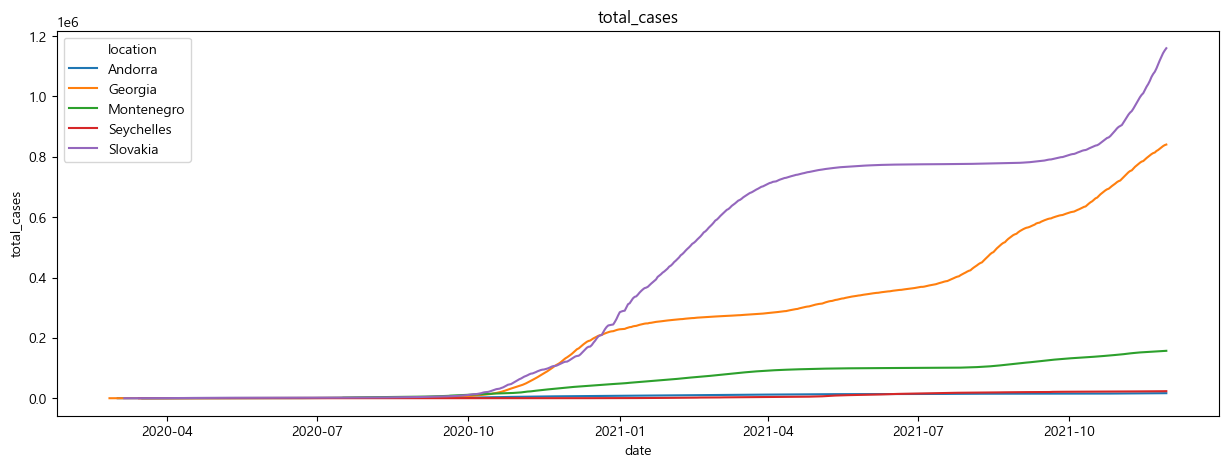

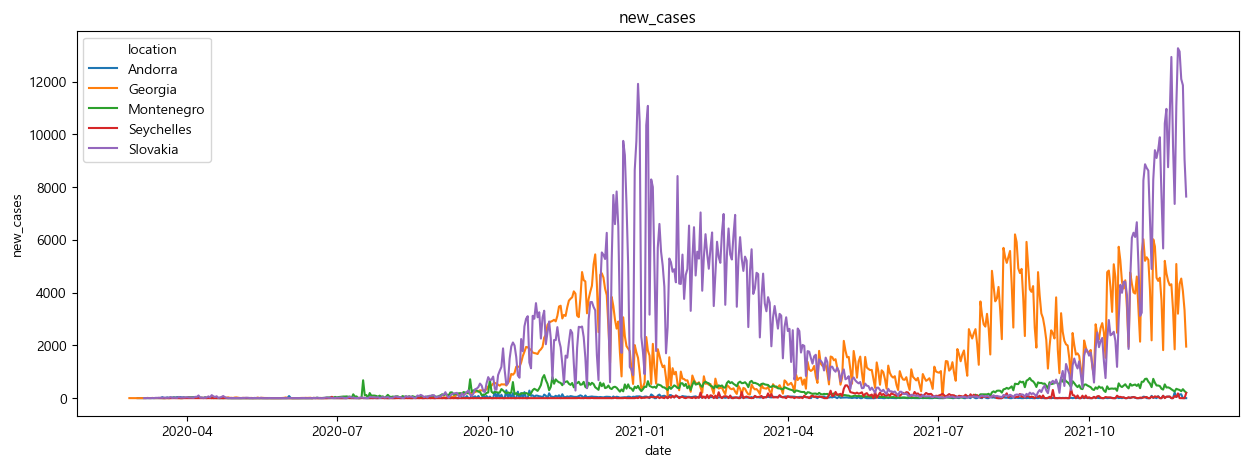

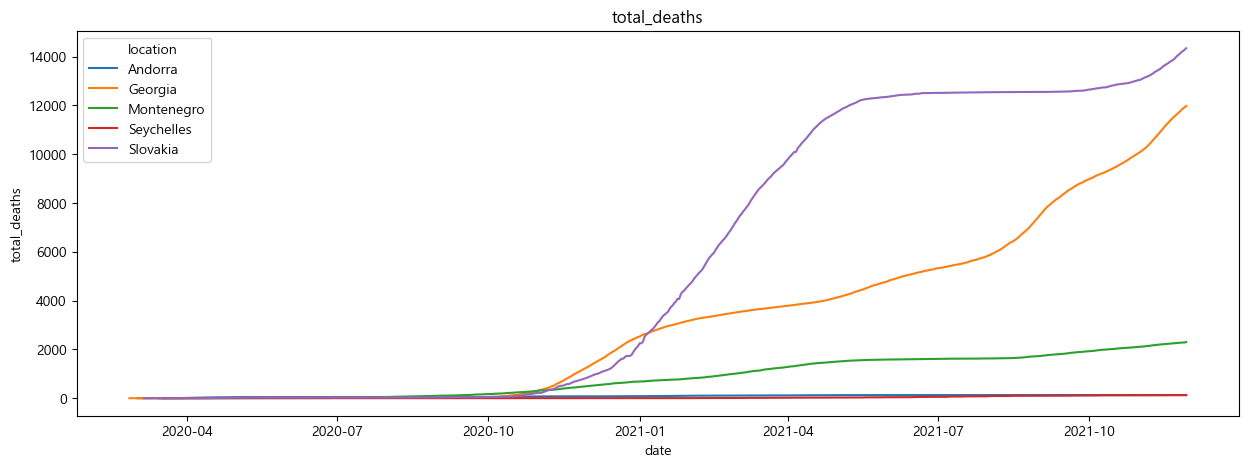

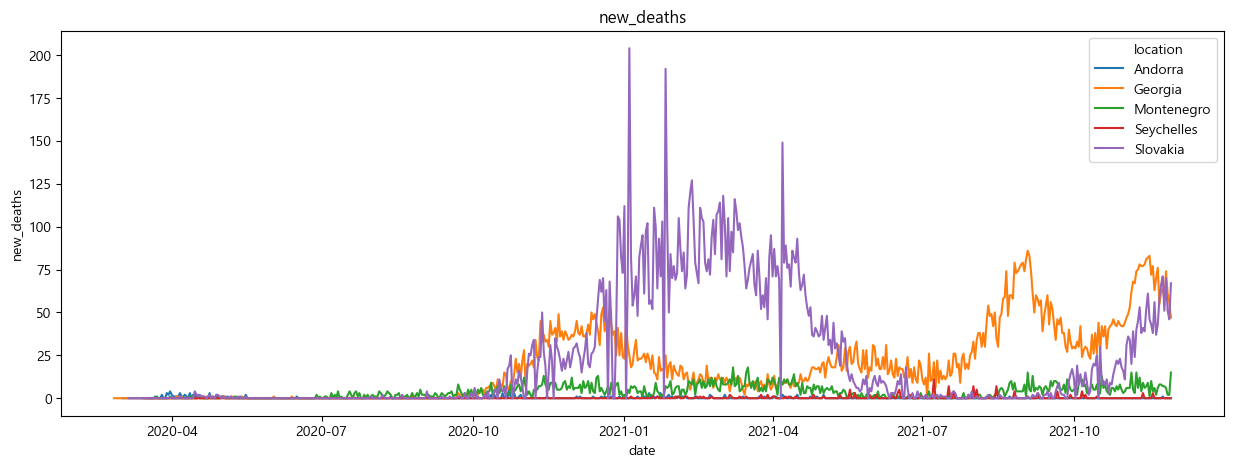

In [3]:
df['ratio'] = df['total_cases'] / df['population']

# 전체 데이터의 결측치 및 일일 확진, 사망자 확인
# 2021-11-30에는 new_tests , new_vaccinations값이 nan 이므로 제외
# 인구수 0인 케이스 제외
import matplotlib.pyplot as plt 
df = df.fillna(0)
df['date']  = pd.to_datetime(df['date'])
df = df[df.date != pd.to_datetime('2021-11-30')]
df = df[df.population !=0]

for location in df.location.unique():
    lo = df[df.location == location]
    df.loc[lo.index,'new_cases'] =lo.total_cases.diff().values
    df.loc[lo.index[0], 'new_cases'] = lo['total_cases'].values[0]
    
    df.loc[lo.index,'new_deaths'] =lo.total_deaths.diff().values
    df.loc[lo.index[0], 'new_deaths'] = lo['total_deaths'].values[0]
    
    df.loc[lo.index, 'total_vacciantions'] = lo['new_vaccinations'].cumsum().values
    df.loc[lo.index, '7days_new_case'] = lo['new_tests'].rolling(7).sum().fillna(0).values

import seaborn as sns
import matplotlib.pyplot as plt

locations = df.groupby(['location']).tail(1).sort_values('ratio',ascending=False).location.head(5).values
target = df[df.location.isin(locations)].reset_index(drop=True)
for v in ['total_cases','new_cases','total_deaths','new_deaths']:
    plt.figure(figsize = (15,5))
    plt.title(v)
    sns.lineplot(data=target,x= 'date',y=v,hue='location')
    plt.show()

In [4]:
df

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations,ratio,new_cases,new_deaths,total_vacciantions,7days_new_case
0,Afghanistan,2020-02-24,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07,5.0,0.0,0.0,0.0
1,Afghanistan,2020-02-25,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07,0.0,0.0,0.0,0.0
2,Afghanistan,2020-02-26,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07,0.0,0.0,0.0,0.0
3,Afghanistan,2020-02-27,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07,0.0,0.0,0.0,0.0
4,Afghanistan,2020-02-28,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
136925,Zimbabwe,2021-11-25,133774.0,4704.0,2291.0,15092171.0,26173.0,8.863801e-03,27.0,1.0,5709051.0,17716.0
136926,Zimbabwe,2021-11-26,133836.0,4704.0,2719.0,15092171.0,31285.0,8.867909e-03,62.0,0.0,5740336.0,17785.0
136927,Zimbabwe,2021-11-27,133836.0,4704.0,4152.0,15092171.0,16111.0,8.867909e-03,0.0,0.0,5756447.0,19518.0
136928,Zimbabwe,2021-11-28,133951.0,4705.0,1044.0,15092171.0,8252.0,8.875529e-03,115.0,1.0,5764699.0,19348.0


### 2.2 코로나 위험지수를 직접 만들고 그 위험지수에 대한 설명을 적고 위험지수가 높은 국가들 10개를 선정해서 시각화


코로나 위험지수는 코로나로 인한 국가의 위기정도를 표현한다. 코로나 전파 특성상 최근 일주일의 확진자 숫자가 그다음의 일주일에 영향을 준다.     
일일 사망자수는 현재 코로나의 국가 내에서의 치명율을 표현한다. 위기정도는 누적 백신인구에 의해 감소 될수 있다. 
국가간의 비교를 위해 각 국가의 인구수로 나눠주어 값을 스케일링하고, 변수간 보정상수를 통해 정수화를 유도한다



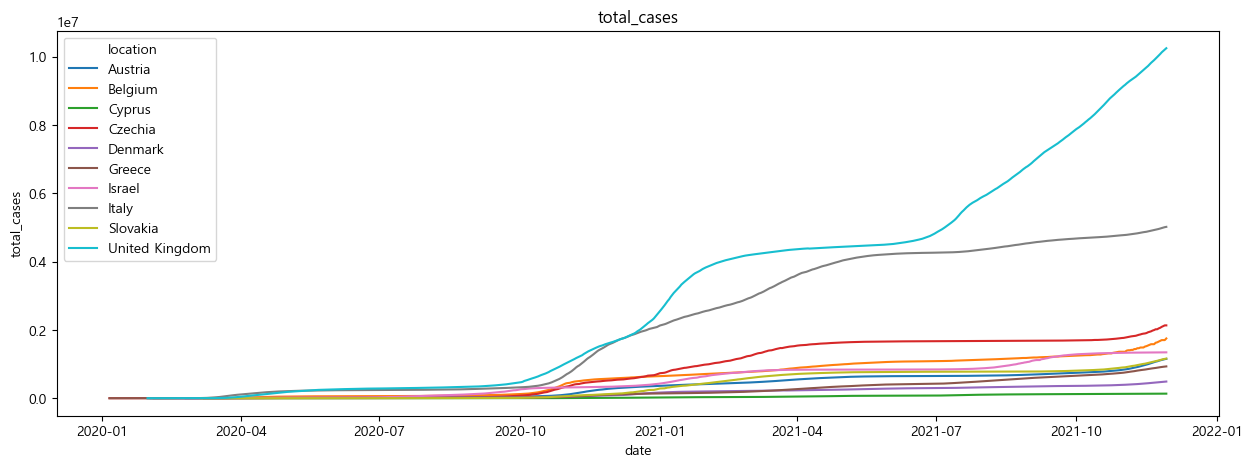

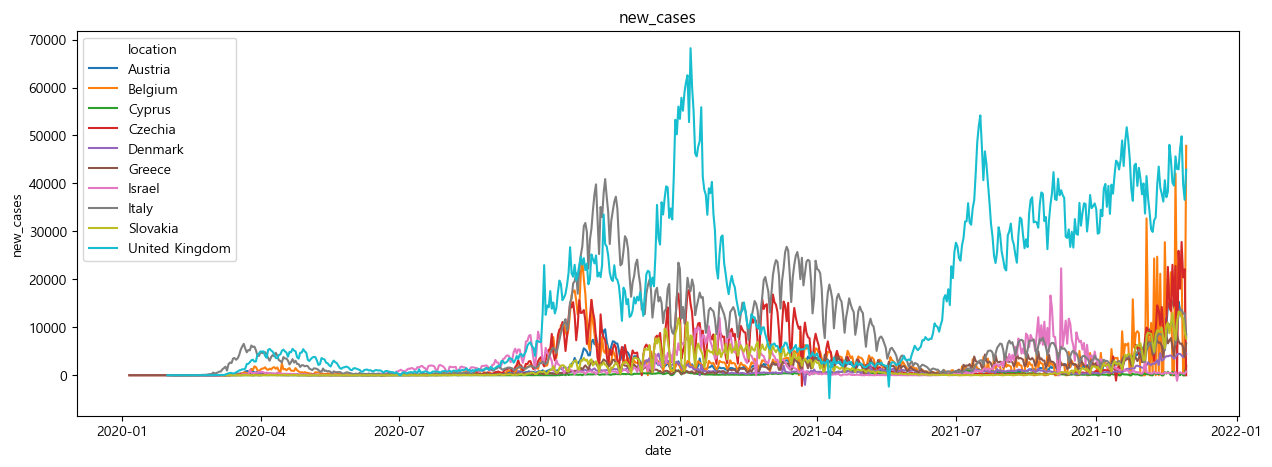

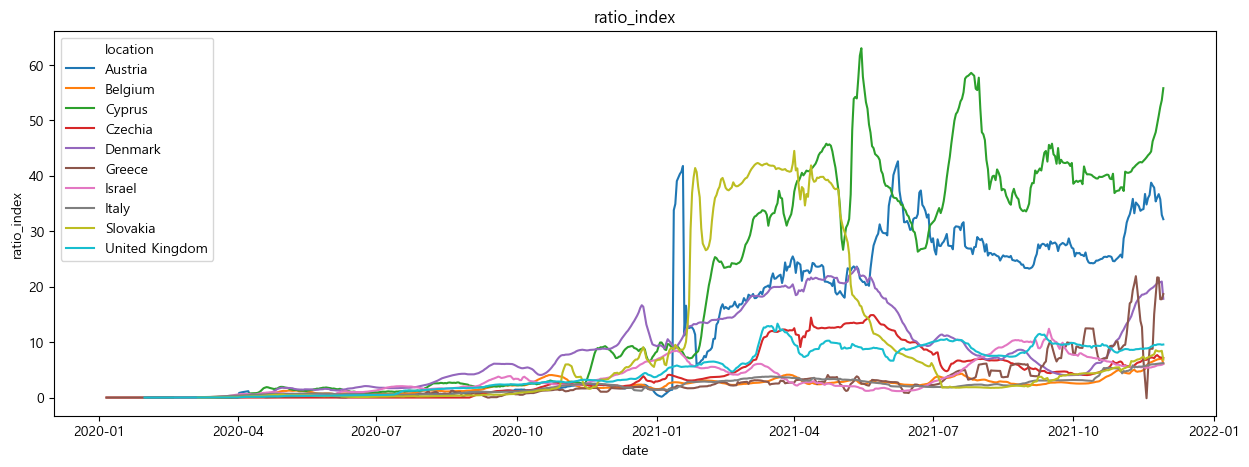

In [5]:
# 위험지수 =  ( 최근일주일 누적 확진자 / 인구수)   + (일일 사망자 / 인구수) - (누적 백신 인구 / 인구수) * 보정 상수) * 보정 상수
print('''
코로나 위험지수는 코로나로 인한 국가의 위기정도를 표현한다. 코로나 전파 특성상 최근 일주일의 확진자 숫자가 그다음의 일주일에 영향을 준다.     
일일 사망자수는 현재 코로나의 국가 내에서의 치명율을 표현한다. 위기정도는 누적 백신인구에 의해 감소 될수 있다. 
국가간의 비교를 위해 각 국가의 인구수로 나눠주어 값을 스케일링하고, 변수간 보정상수를 통해 정수화를 유도한다
''')

def ratio_index(x):
    value = (x['7days_new_case'] / x['population'] + x['new_deaths'] / x['population'] - x['total_vacciantions'] / x['population']*0.001) *100
    return value


df['ratio_index'] = df.apply(ratio_index,axis=1)


locations = df.groupby(['location']).tail(1).sort_values('ratio_index',ascending=False).location.head(10).values
target = df[df.location.isin(locations)].reset_index(drop=True)
for v in ['total_cases','new_cases','ratio_index']:
    plt.figure(figsize = (15,5))
    plt.title(v)
    sns.lineplot(data=target,x= 'date',y=v,hue='location')
    plt.show()

### 2.3 한국의 코로나 신규 확진자 예측해라(선형 시계열모델 + 비선형시계열 각각 한개씩 만들어라)
선형시계열 - arma 비선형 시계열 - arima

In [7]:
ko = df[df.location =='South Korea'].reset_index(drop=True)
ko.head()

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations,ratio,new_cases,new_deaths,total_vacciantions,7days_new_case,ratio_index
0,South Korea,2020-01-21,0.0,0.0,0.0,51305184.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
1,South Korea,2020-01-22,1.0,0.0,5.0,51305184.0,0.0,1.949121e-08,1.0,0.0,0.0,0.0,0.0
2,South Korea,2020-01-23,1.0,0.0,0.0,51305184.0,0.0,1.949121e-08,0.0,0.0,0.0,0.0,0.0
3,South Korea,2020-01-24,2.0,0.0,0.0,51305184.0,0.0,3.898242e-08,1.0,0.0,0.0,0.0,0.0
4,South Korea,2020-01-25,2.0,0.0,0.0,51305184.0,0.0,3.898242e-08,0.0,0.0,0.0,0.0,0.0


                            AutoReg Model Results                             
Dep. Variable:              new_cases   No. Observations:                  679
Model:                     AutoReg(3)   Log Likelihood               -4376.552
Method:               Conditional MLE   S.D. of innovations            156.844
Date:                Mon, 03 Jul 2023   AIC                           8763.103
Time:                        13:34:04   BIC                           8785.684
Sample:                             3   HQIC                          8771.846
                                  679                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.0652      7.966      1.264      0.206      -5.547      25.678
new_cases.L1     0.9978      0.037     27.163      0.000       0.926       1.070
new_cases.L2    -0.3117      0.052     -6.00

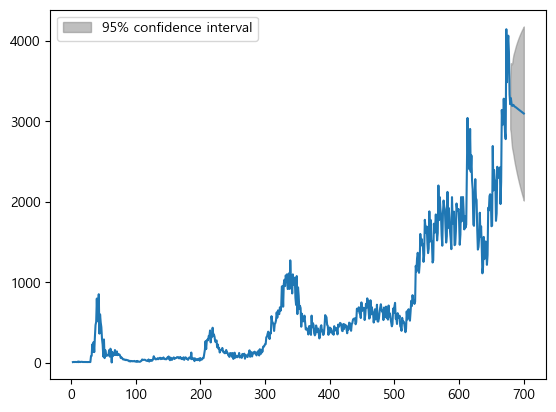

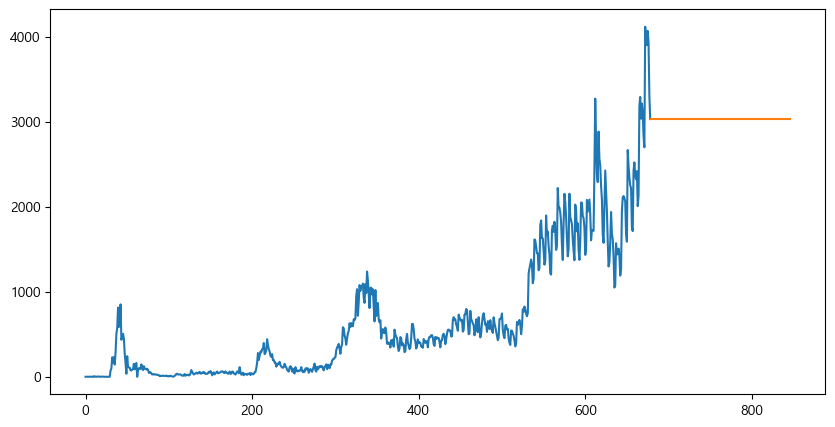

In [16]:
# 선형 모델 - armr
from statsmodels.tsa.ar_model import AutoReg
mod = AutoReg(ko.new_cases, 3, old_names=False)
res = mod.fit()
print(res.summary())
fig = res.plot_predict(1,700)

# 비선형 모델 -arima 사용
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ko.new_cases, order=(0,1,1))
model_fit = model.fit()
print('\n'*2, model_fit.summary())

forecast = model_fit.forecast(steps=24*7)

plt.figure(figsize=(10,5))
plt.plot(ko.new_cases)
plt.plot(forecast)

## 3. 설문조사 데이터
- 데이터 출처 : 자체 제작
- data Url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p3/problem3.csv 
- 데이터 설명
    - A ~ D까지의 그룹에게 각각 같은 설문조사를 하여 1-1,1-2,1-3…5-1,5-4 인 설문지를 푼 것이다.
    - 문항은 영역별로 나뉘어 있고, 영역은 크게 5개이다(1~5)
    - 각 영역의 세부문항은 4개씩 존재한다 (1-1,1-2,1-3,1-4 ~) 이 때 중간에 반대 문항이 들어가 있다. 예를 들어 1-1 문제가 “나는 시간약속을 잘 지킨다.”라는 문제라면 1-3의 문제는 “나는 시간약속을 잘 지키지 않는다.” 라는 역문제로 구성 되어있다.
    - 각 영역의 3번문항은 1번문항의 역문제이다. 모든 답변은 5점 척도이다. 문제를 풀기전 모든 역문항의 경우 점수를 변환(6점을 빼서) 작업이 필요하다

In [63]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/17/problem3.csv')
df.head()

,userid,group,Q1-1,Q1-2,Q1-3,Q1-4,Q2-1,Q2-2,Q2-3,Q2-4,...,Q3-3,Q3-4,Q4-1,Q4-2,Q4-3,Q4-4,Q5-1,Q5-2,Q5-3,Q5-4
0,0,A,5,2,1,2,4,5,3,3,...,1,1,5,2,5,3,3,4,3,4
1,1,A,2,2,3,3,4,3,1,4,...,2,3,4,3,5,3,1,2,1,1
2,2,A,1,3,4,4,2,1,4,4,...,4,2,1,3,4,1,3,3,2,5
3,3,A,3,3,4,2,2,4,4,3,...,2,3,3,4,2,4,1,1,3,2
4,4,A,3,1,2,3,4,3,4,1,...,5,1,3,2,3,1,3,2,5,4


### 3.1 역문항을 변환 한 후 각 그룹(A~D)의 영역(Q1~Q5)별 응답의 평균, 표준편차, 왜도, 첨도를 구하라. (각 통계량 별로 4x5 dataframe 생성)

In [64]:
# 역변환
for num in range(1, 6):
    df[f'Q{num}-3'] = 6 - df[f'Q{num}-3']

# 그룹별 데이터 프레임 추출하여 '통계 dataframe' 생성
for num in range(1,6):
    col_lst = ['group']
    for col in range(1,5):
        col_lst.append(f'Q{num}-{col}')
        
    target = df[col_lst]
    
    targetdf =target.set_index('group').unstack().to_frame().reset_index()[['group',0]].rename(columns ={0: f'Q{num}'})
    
    display(targetdf.groupby('group').agg(['mean','std','skew',pd.DataFrame.kurt]))

Q1                              
        mean       std      skew      kurt
group                                     
A      3.016  1.263860 -0.077803 -1.087887
B      3.042  1.242489 -0.126751 -1.022905
C      3.030  1.243642 -0.050626 -1.033246
D      2.991  1.264325 -0.069421 -1.081406

Q2                              
        mean       std      skew      kurt
group                                     
A      3.058  1.236999 -0.129390 -0.997133
B      3.048  1.266215 -0.111043 -1.060834
C      3.063  1.256427 -0.122030 -1.046603
D      3.091  1.249913 -0.166334 -1.018150

Q3                              
        mean       std      skew      kurt
group                                     
A      2.992  1.268679 -0.061600 -1.098330
B      3.050  1.238965 -0.117158 -1.035672
C      3.023  1.248210 -0.102330 -0.988577
D      3.034  1.255556 -0.128043 -1.043094

Q4                              
        mean       std      skew      kurt
group                                     
A      3.043  1.255678 -0.090314 -1.028166
B      3.041  1.240507 -0.071541 -1.014676
C      3.014  1.283531 -0.074531 -1.100094
D      3.080  1.268546 -0.144620 -1.006126

Q5                              
        mean       std      skew      kurt
group                                     
A      3.088  1.256119 -0.102638 -1.053632
B      2.983  1.272136 -0.055805 -1.080934
C      2.987  1.260325 -0.068696 -1.071557
D      2.989  1.250777 -0.065315 -1.055332

### 3.2 그룹별로 Q1-1문항의 차이가 존재하는지 anova분석을 시행하라

In [41]:
# 그룹별 데이터 생성
for group in ['A', 'B', 'C', 'D']:
    globals()['{}_group'.format(group)] = df.loc[df['group']==group, 'Q1-1']

In [56]:
# 정규성 검정
import scipy.stats as stats
print(stats.shapiro(A_group)) # 정규성 만족 못함.
print(stats.shapiro(B_group)) # 정규성 만족 못함.
print(stats.shapiro(C_group)) # 정규성 만족 못함.
print(stats.shapiro(D_group)) # 정규성 만족 못함.

ShapiroResult(statistic=0.8959194421768188, pvalue=4.089666539447423e-12)
ShapiroResult(statistic=0.9031107425689697, pvalue=1.2895768654319628e-11)
ShapiroResult(statistic=0.9036667346954346, pvalue=1.4126045819184974e-11)
ShapiroResult(statistic=0.8961024284362793, pvalue=4.2081052184506085e-12)


In [58]:
# 등분산성 검정
stats.levene(A_group, B_group, C_group, D_group) # 등분산성 만족함.

LeveneResult(statistic=0.24718103455049822, pvalue=0.8633690011210747)

In [57]:
# 크루스칼 왈리스 검정(비모수 검정)
stats.kruskal(A_group, B_group, C_group, D_group) # p-value > 0.05이므로 통계적으로 유의한 차이가 없음.

KruskalResult(statistic=4.567127187870985, pvalue=0.20638028098088249)

### 3.3 탐색적 요인분석을 수행하고 결과를 시각화 하라

In [66]:
# 요인성 검정
# !pip install factor-analyzer==0.3.2
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
ana = df.drop(columns = ['userid','group'])
chi_square_value,p_value=calculate_bartlett_sphericity(ana)
chi_square_value, p_value # p-value <0.05이므로 요인성 평가에 적합함.

(232.67704188784538, 0.0020674218384496255)

In [67]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(ana)
kmo_model
# kmo 결과 0.6 이하는 부적합하다 본다

0.4901789141416505

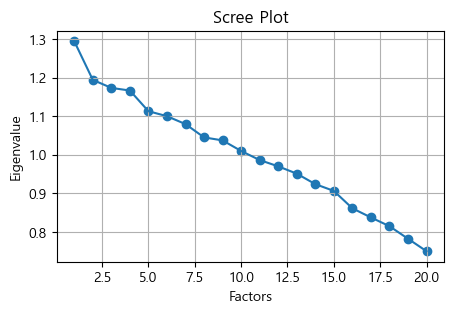

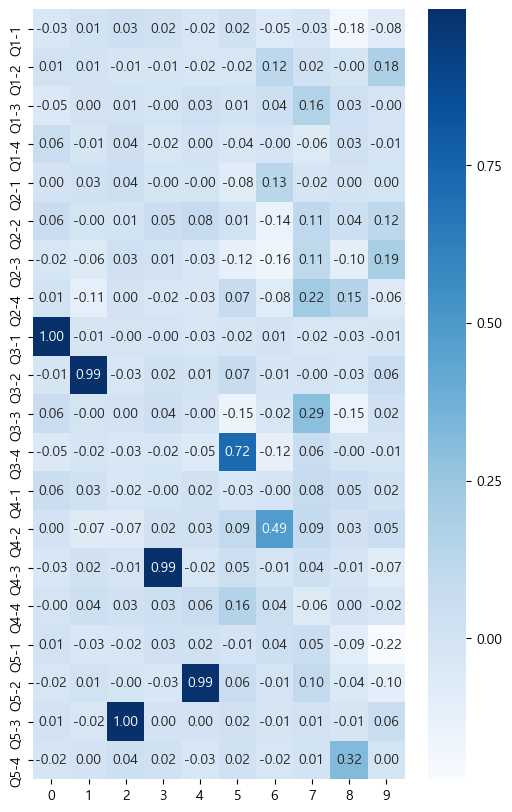

In [72]:
# 요인 수 선택
fa = FactorAnalyzer(n_factors=25,rotation=None)
fa.fit(ana)

# Eigen값 체크 
plt.figure(figsize=(5,3))
ev, v = fa.get_eigenvalues()
plt.scatter(range(1,ana.shape[1]+1),ev)
plt.plot(range(1,ana.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show() # eigenvalue가 1이 되는지점인 10개의 요인이 선택에 적합한 숫자로 확인

# 탐색적 요인 분석 실시
fa = FactorAnalyzer(n_factors=10, rotation="varimax") #ml : 최대우도 방법
fa.fit(ana)
efa_result= pd.DataFrame(fa.loadings_, index=ana.columns)
plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f');

[해석]
- 요인0은 Q3-1에 대해 높은 요인 적재량을 갖는다.
- 요인1은 Q3-2에 대해 높은 요인 적재량을 갖는다.
- 요인2는 Q5-3에 대해 높은 요인 적재량을 갖는다.
- 요인3은 Q4-3에 대해 높은 요인 적재량을 갖는다.
- 요인4는 Q5-2에 대해 높은 요인 적재량을 갖는다.
- 요인5는 Q3-4에 대해 높은 요인 적재량을 갖는다.
- 요인6, 7, 8, 9에는 변수에 대해 높은 요인 적재량이 없다고 해석할 수 있다.
- 따라서 요인0 ~ 요인5까지 총 5가지 요소만 활용하는 것이 좋다. 